135.jpg
./data/train/135.jpg


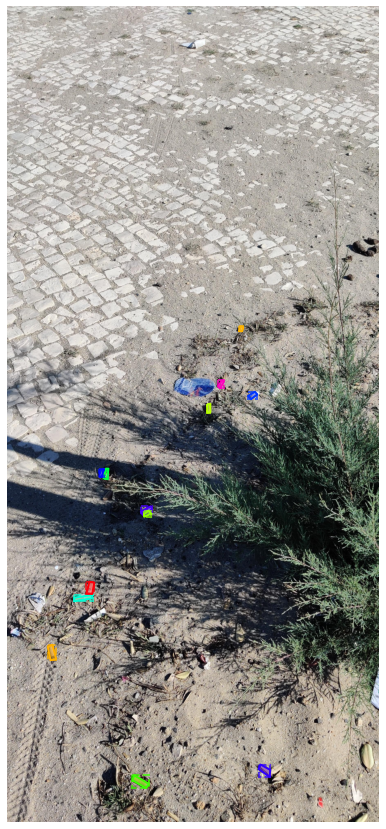

In [4]:
from PIL import Image, ExifTags
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle
from matplotlib.collections import PatchCollection
import colorsys
import pylab
import json

id=135

# User settings
root = "./data/train/"
ann_file = root + "annotations.json"
pylab.rcParams['figure.figsize'] = (15,15)

# Load annotation file
data=json.load(open(ann_file))

for image in data["images"]:
    if image["id"]==id:
        file_name=image["file_name"]
        print(file_name)

# Load image
print(root+file_name)
I = Image.open(root+ file_name)

# Show image
fig,ax = plt.subplots(1)
plt.axis('off')
plt.imshow(I)

# Load mask ids
for annotations in data["annotations"]:
    if annotations["image_id"]==id:
        mask=annotations["segmentation"]
        bbox=annotations["bbox"]
        color = colorsys.hsv_to_rgb(np.random.random(),1,1)
        for seg in mask:
            poly = Polygon(np.array(seg).reshape((int(len(seg)/2), 2)))
            p = PatchCollection([poly], facecolor=color, edgecolors=color,linewidths=0, alpha=0.4)
            ax.add_collection(p)
            p = PatchCollection([poly], facecolor='none', edgecolors=color, linewidths=2)
            ax.add_collection(p)
        [x, y, w, h] = bbox
        rect = Rectangle((x,y),w,h,linewidth=2,edgecolor=color, facecolor='none', alpha=0.7, linestyle = '--')
        ax.add_patch(rect)

plt.show()